### Kaggle Dataset link : [https://www.kaggle.com/pranavraikokte/covid19-image-dataset](https://www.kaggle.com/pranavraikokte/covid19-image-dataset)

### Train a model that will determine if a person is affected by Covid or is it a viral fever or the person is normal. 

## Importing all the necessary libraries

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling2D

## Loading the train data

In [2]:
file_path = 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train'

In [3]:
name_class = os.listdir(file_path)
name_class

['Covid', 'Normal', 'Viral Pneumonia']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\01.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\010.png',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\012.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\015.jpg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\019.png',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\02.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\020.jpg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\021.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\022.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\024.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\025.jpeg',
 'D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\train\\Covid\\026.jpeg'

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',
 'Covid',


In [7]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels],axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Label
0,D:\Documents\TCS Assignment\archive\Covid19-da...,Covid
1,D:\Documents\TCS Assignment\archive\Covid19-da...,Viral Pneumonia
2,D:\Documents\TCS Assignment\archive\Covid19-da...,Viral Pneumonia
3,D:\Documents\TCS Assignment\archive\Covid19-da...,Normal
4,D:\Documents\TCS Assignment\archive\Covid19-da...,Normal


## Data Visualization

([0, 1, 2],
 [Text(0, 0, 'Covid'), Text(1, 0, 'Viral Pneumonia'), Text(2, 0, 'Normal')])

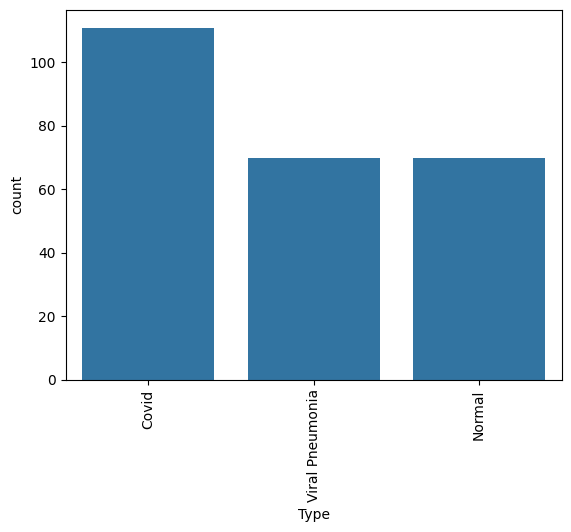

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [9]:
train,test = train_test_split(data, test_size=0.25, random_state=42)

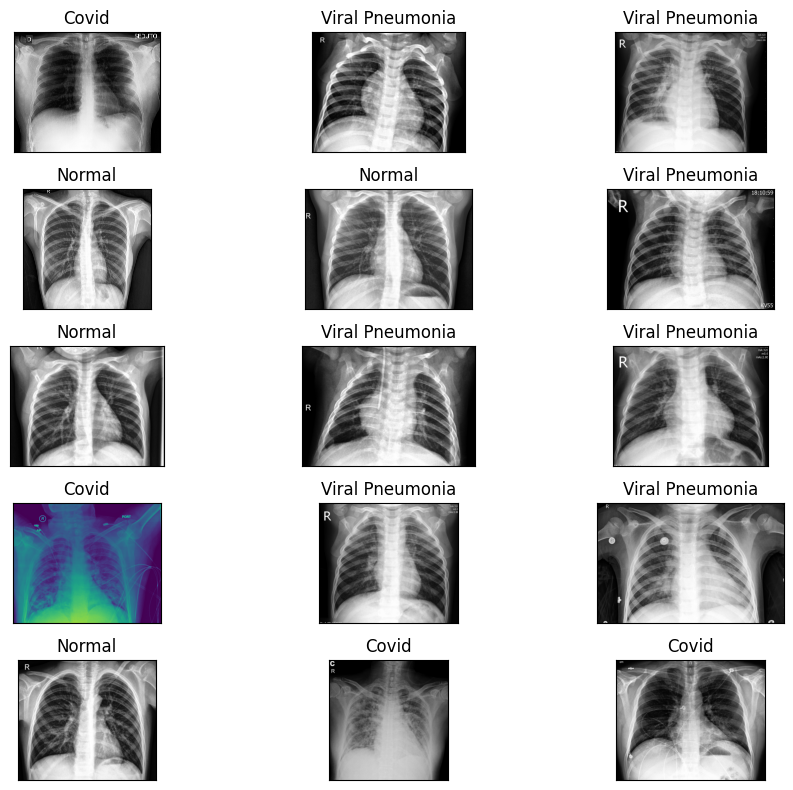

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen=train_datagen.flow_from_dataframe(
          dataframe=train,
          x_col='Filepath',
          y_col='Label',
          target_size=(100,100),
          class_mode='categorical',
          batch_size=32,
          shuffle=True,
          seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
          dataframe=test,
          x_col='Filepath',
          y_col='Label',
          target_size=(100,100),
          class_mode='categorical',
          batch_size=32,
          shuffle=False,
          seed=42
)

test_gen = test_datagen.flow_from_dataframe(
          dataframe=test,
          x_col='Filepath',
          y_col='Label',
          target_size=(100,100),
          class_mode='categorical',
          batch_size=32,
          shuffle=False
)

Found 188 validated image filenames belonging to 3 classes.
Found 63 validated image filenames belonging to 3 classes.
Found 63 validated image filenames belonging to 3 classes.


## Loading the pretrained ResNet50 Model

In [13]:
pretrained_model = ResNet50(
                   input_shape=(100,100,3),
                   include_top=False,
                   weights='imagenet')
pretrained_model.trainable = False

In [14]:
inputs=pretrained_model.input

x=Dense(128, activation='relu')(pretrained_model.output)
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)

outputs=Dense(3, activation='softmax')(x)

model=Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [16]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=4,
                             mode='auto')]

In [17]:
history=model.fit(
       train_gen,
       validation_data=valid_gen,
       epochs=20,
       callbacks=my_callbacks)

Epoch 1/20
6/6 [==============================] - 15s 2s/step - loss: 1.2206 - accuracy: 0.5585 - val_loss: 0.7136 - val_accuracy: 0.6190
Epoch 2/20
6/6 [==============================] - 12s 2s/step - loss: 0.3142 - accuracy: 0.8777 - val_loss: 0.2268 - val_accuracy: 0.9206
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 0.1582 - accuracy: 0.9521 - val_loss: 0.2623 - val_accuracy: 0.9365
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 0.1008 - accuracy: 0.9787 - val_loss: 0.1926 - val_accuracy: 0.9365
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 0.0658 - accuracy: 0.9840 - val_loss: 0.2091 - val_accuracy: 0.9365
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 0.0363 - accuracy: 0.9947 - val_loss: 0.1829 - val_accuracy: 0.9365
Epoch 7/20
6/6 [==============================] - 11s 2s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.1773 - val_accuracy: 0.9524
Epoch 8/20
6/6 [==================

In [18]:
model.save("model_resnet50.h5")

C:\Users\Ekta\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Graph Between Accuracy vs loss

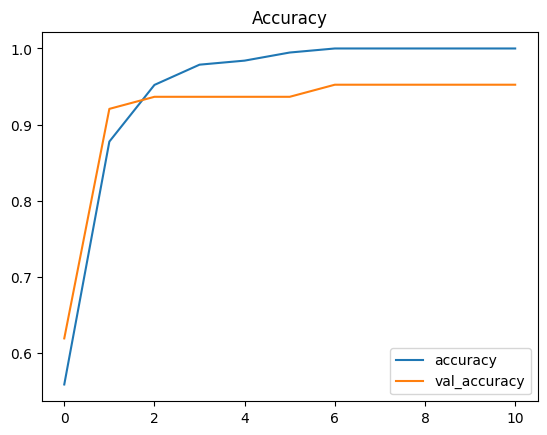

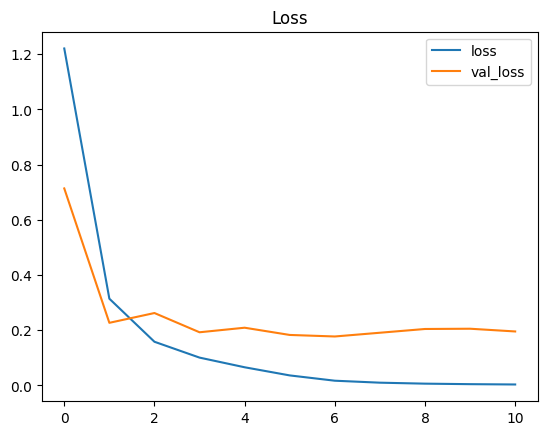

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [20]:
results=model.evaluate(test_gen, verbose=0)

print("Test loss : {:.5f}".format(results[0]))
print("Test Accuracy : {:.2f}%". format(results[1]*100))

Test loss : 0.19553
Test Accuracy : 95.24%


In [21]:
#Predict the label of the test_gen
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map the label
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

2/2 [==============================] - 3s 1s/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

          Covid       0.94      0.97      0.95        30
         Normal       0.96      0.96      0.96        25
Viral Pneumonia       1.00      0.88      0.93         8

       accuracy                           0.95        63
      macro avg       0.97      0.93      0.95        63
   weighted avg       0.95      0.95      0.95        63



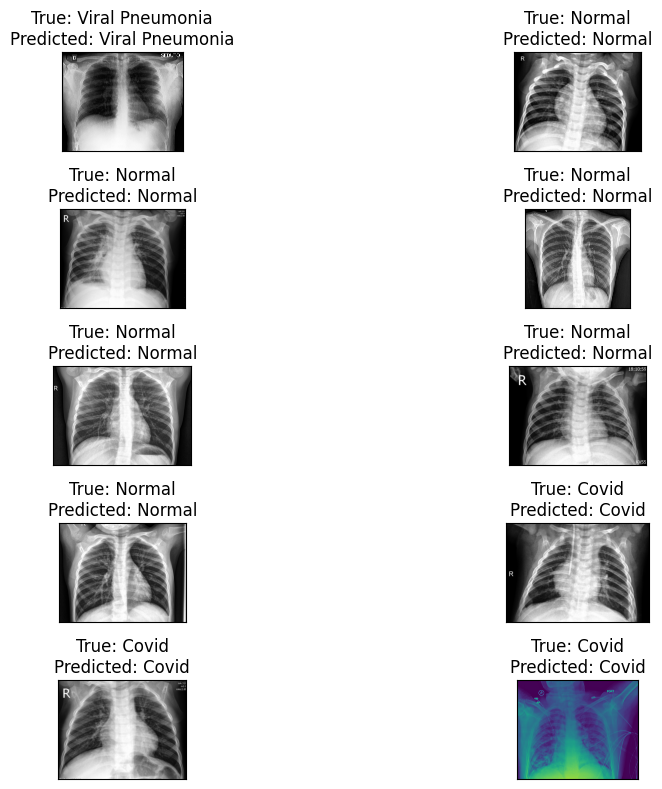

In [23]:
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(12,8),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## Testing the Model 

In [30]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path="D:\\Documents\\TCS Assignment\\archive\\Covid19-dataset\\test\\Viral Pneumonia\\0110.jpeg"
img=cv2.imread(img_path)
img=cv2.resize(img, (100,100))

x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)

print((result*100).astype('int'))

1/1 [==============================] - 0s 40ms/step
[[ 0  0 99]]
